<a href="https://colab.research.google.com/github/KshamaHirekhan/IT-Spendings-in-POWER-BI-/blob/main/HR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
hr_data=pd.read_csv('/content/HR_comma_sep.csv')

Hr Data Analytics
This dataset contains information about employees who worked in a company.



Content

This dataset contains columns: Satisfactory Level, Number of Project, Average Monthly Hours, Time Spend Company, Promotion Last 5
Years, Department, Salary

In [ ]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1- Do Exploratory Data analysis to figure out which variables have a direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)


2- Plot bar charts showing the impact of employee salaries on retention

3- Plot bar charts showing a correlation between department and employee retention

4- Now build lologistic regression model using variables that were narrowed down in step 1

5- Measure the accuracy of the model

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The HR Data is having no null values , Department and Salary is the object Value. 

In [ ]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
hr_data.shape

(14999, 10)

It has 14999 rows and 10 columns

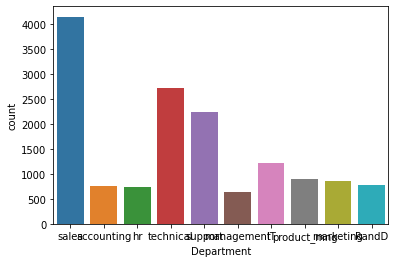

In [ ]:
sns.countplot(x = 'Department', data= hr_data )

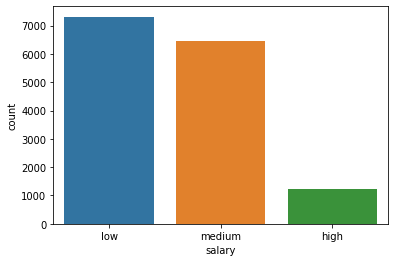

In [ ]:
sns.countplot(x = 'salary', data= hr_data )

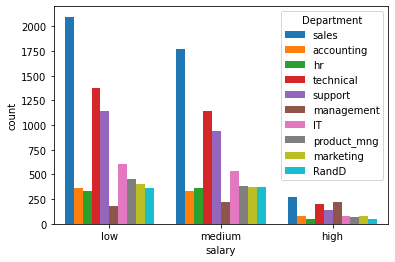

In [ ]:
sns.countplot(x = 'salary', data= hr_data, hue='Department', saturation=1,  )

In [ ]:
hr_data['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [ ]:
hr_data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<function matplotlib.pyplot.show>

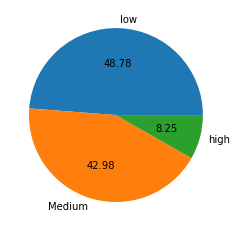

In [ ]:
import matplotlib.pyplot as plt
plt.pie(hr_data['salary'].value_counts(),labels=['low','Medium','high'],autopct="%00.2f")
plt.show

There are 49% employee are in  low salaries whic is almost half of the all level of jobs and only 1/8th of high salaries. 

<function matplotlib.pyplot.show>

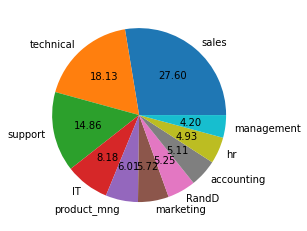

In [ ]:
import matplotlib.pyplot as plt
plt.pie(hr_data['Department'].value_counts(),labels=['sales','technical','support' ,'IT' ,'product_mng' ,'marketing' ,'RandD' ,'accounting','hr','management'],autopct="%00.2f")
plt.show

there are higher number of employee in Sales , technical n support department. 

In [ ]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


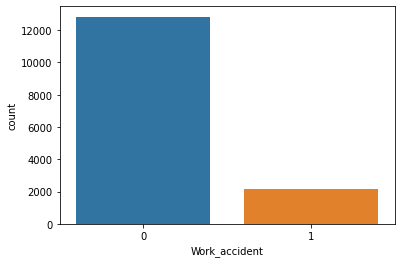

In [ ]:
sns.countplot(x='Work_accident', data=hr_data)

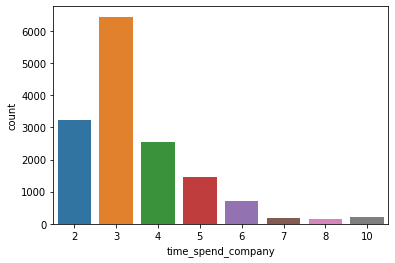

In [ ]:
sns.countplot(x='time_spend_company', data=hr_data)

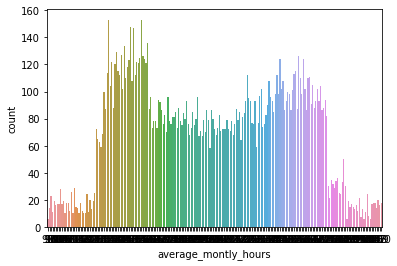

In [ ]:
sns.countplot(x='average_montly_hours', data=hr_data)

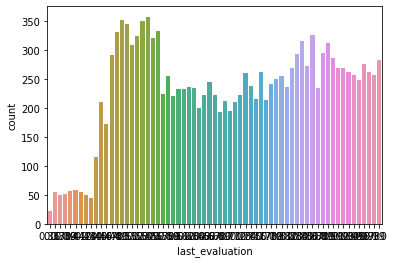

In [ ]:
sns.countplot(x='last_evaluation', data=hr_data)

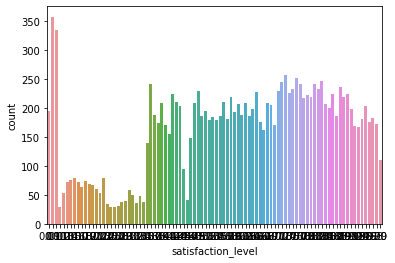

In [ ]:
sns.countplot(x='satisfaction_level', data=hr_data)

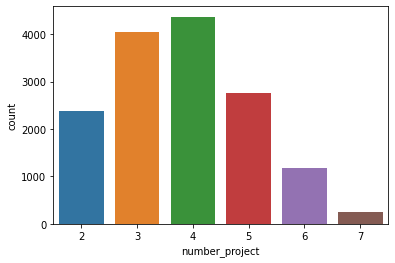

In [ ]:
sns.countplot(x = 'number_project', data= hr_data )

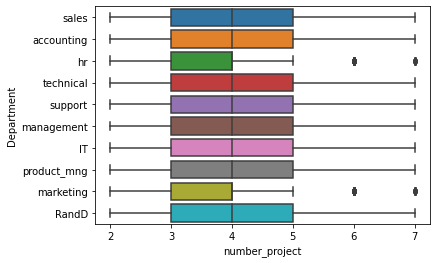

In [ ]:
sns.boxplot(x ='number_project', y='Department' , data=hr_data)

Marketing has vey less number of projects a compare to other departments. 

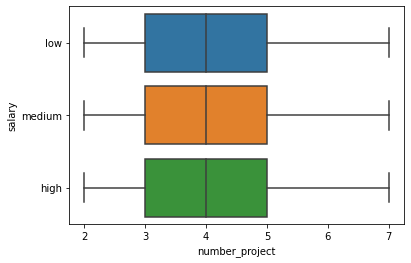

In [ ]:
sns.boxplot(x ='number_project', y='salary' , data=hr_data)

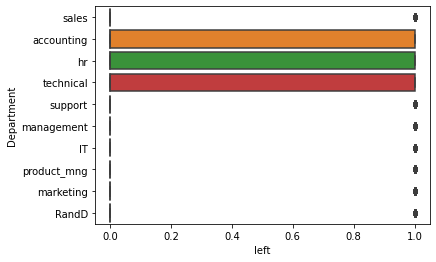

In [ ]:
sns.boxplot(x ='left', y='Department' , data=hr_data)

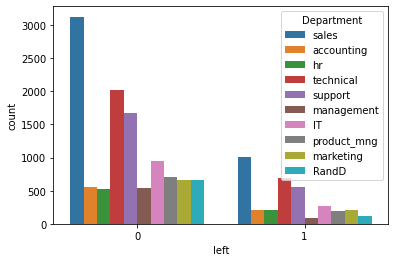

In [ ]:
sns.countplot(x='left',hue='Department', data=hr_data)

highest number of employee left from sales , technical and support department. 

---



In [ ]:
hr_data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

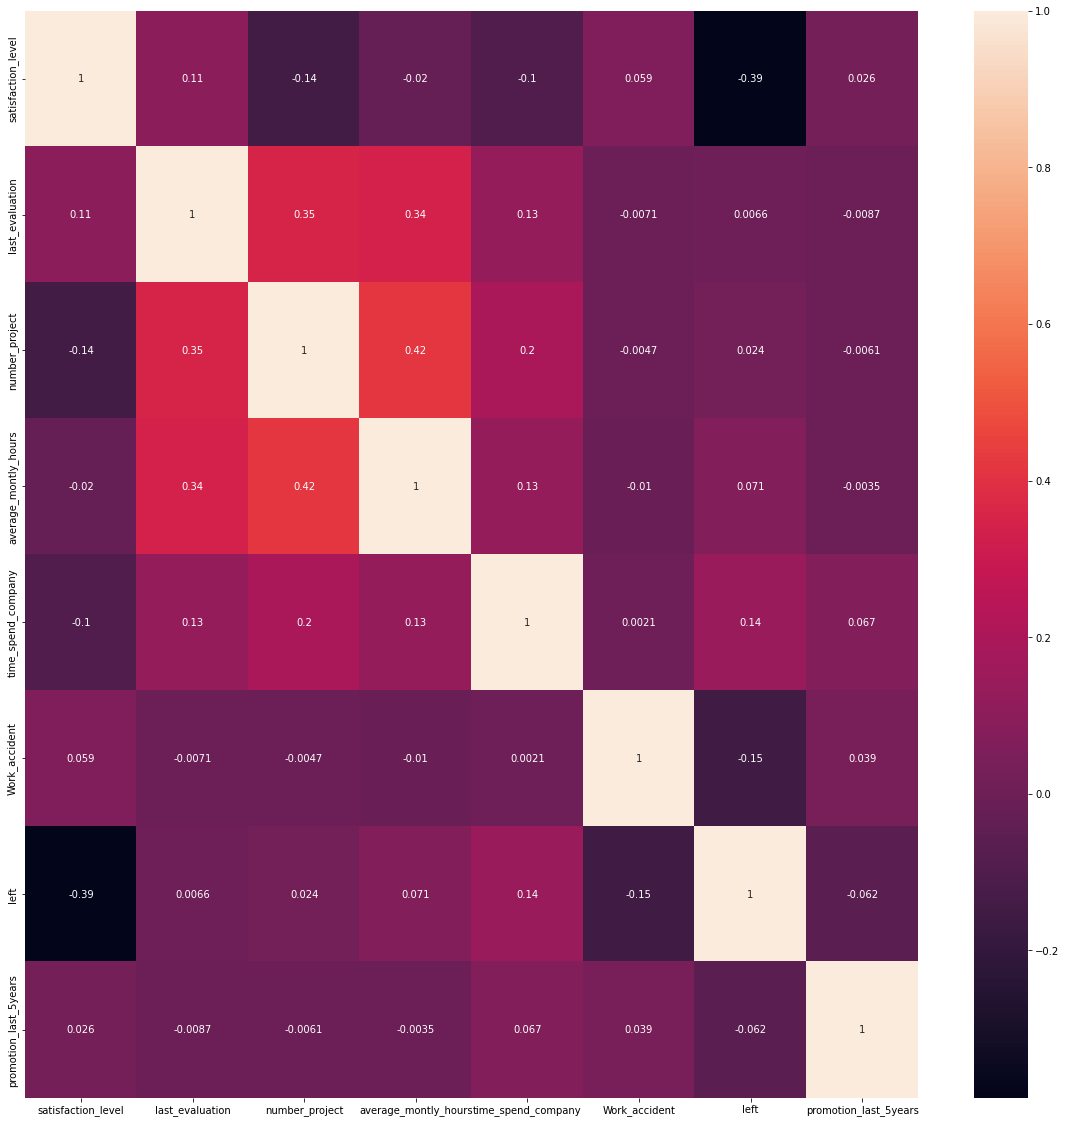

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=hr_data.corr(),annot=True);

In [ ]:
hr_data.corr()['left'].sort_values()[:-1]

satisfaction_level      -0.388375
Work_accident           -0.154622
promotion_last_5years   -0.061788
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Name: left, dtype: float64

<Figure size 1440x1440 with 0 Axes>

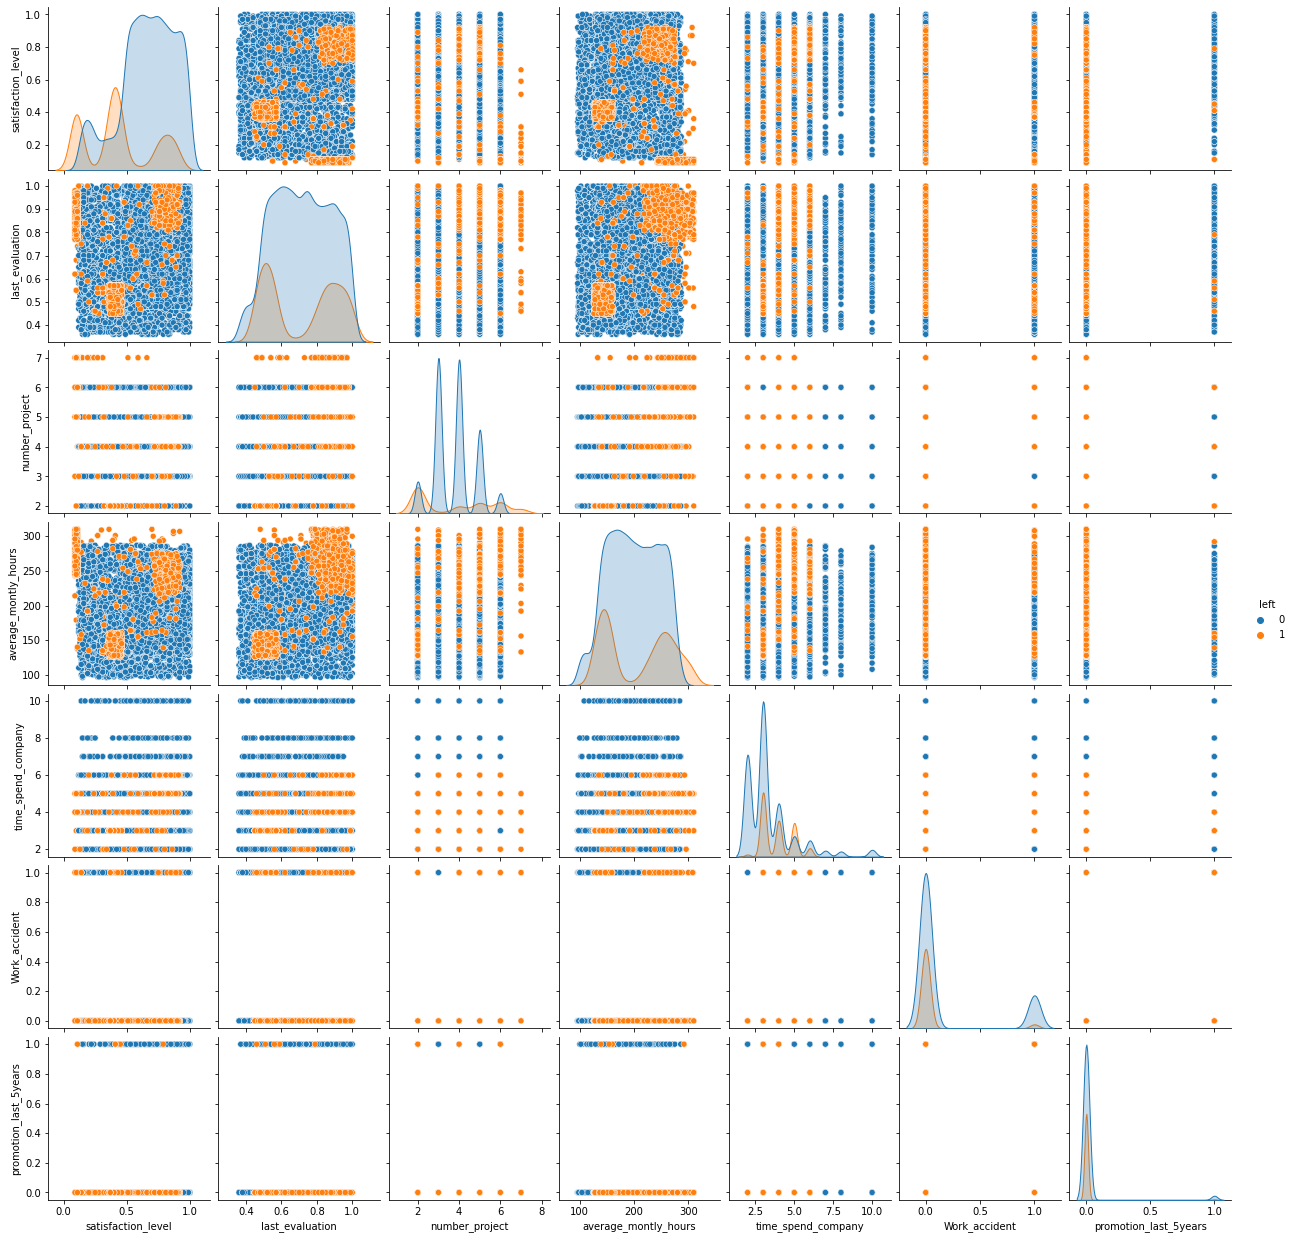

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(data=hr_data,hue='left')

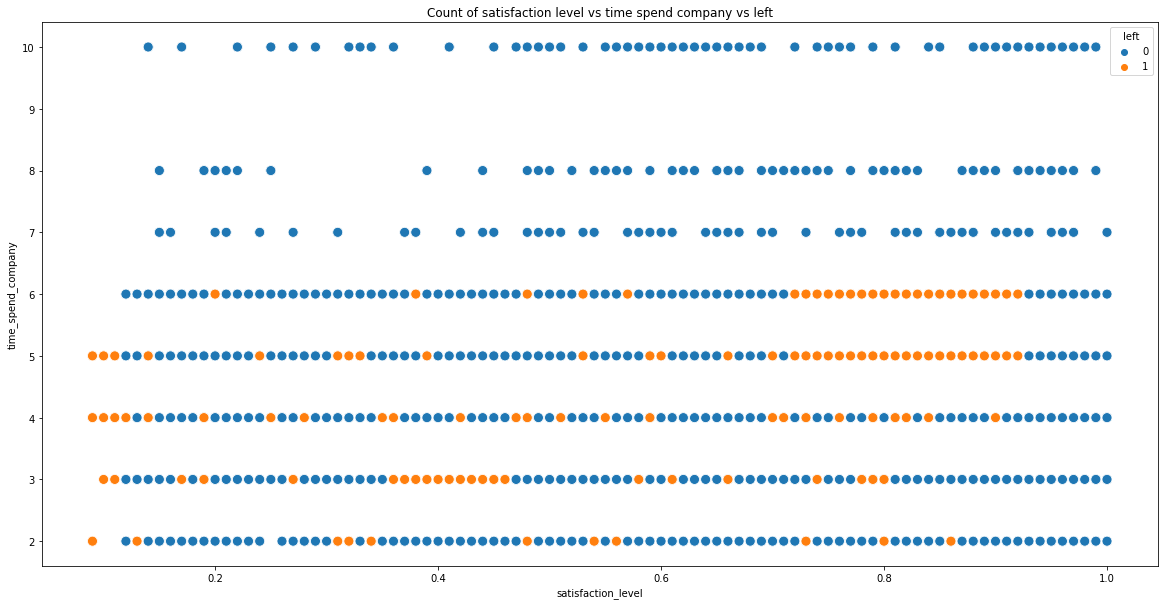

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Count of satisfaction level vs time spend company vs left')
sns.scatterplot(data=hr_data, x='satisfaction_level',y='time_spend_company', hue='left',s=100);

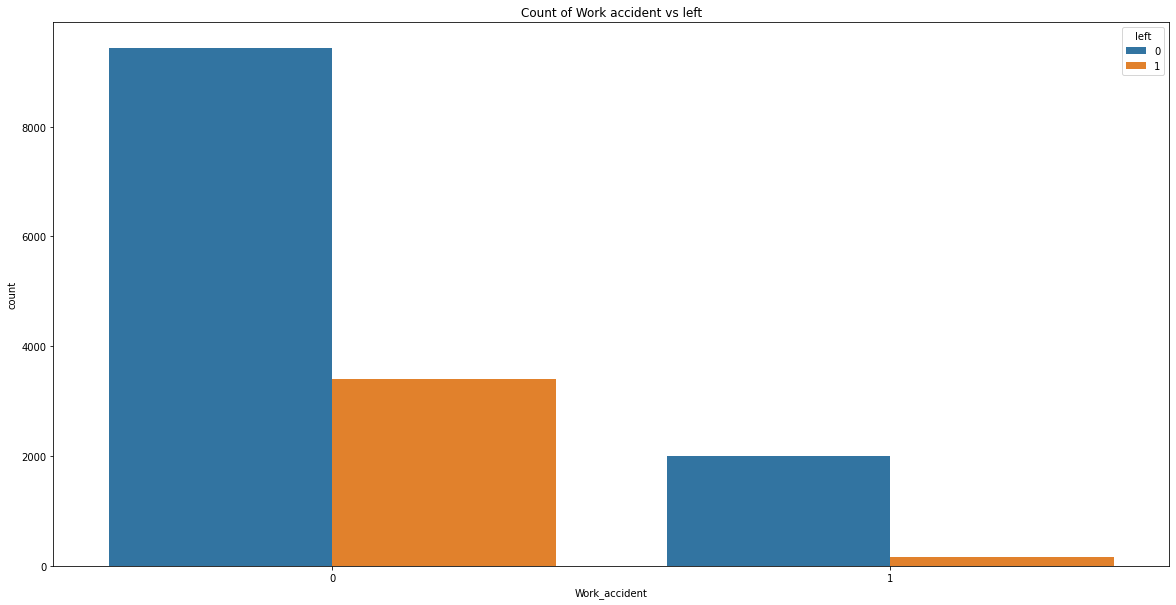

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Count of Work accident vs left')
sns.countplot(data=hr_data, x='Work_accident', hue='left')

Modeling


In [ ]:
df = pd.get_dummies(hr_data, drop_first=True)

In [ ]:
X = hr_data.drop('left', axis=1)
y = hr_data['left']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: ignored